# Notes
- Last updated 3/29 11pm

In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
# Get counties
top_county_file = "Zillow CSV results/top_counties_Median_Sale_Price.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "Zillow CSV results/bottom_counties_Median_Sale_Price.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)
top_county_df["StateName"] = top_county_df["StateName"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['StateName']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)
top_county_clean

,County
0,"Suffolk, MA"
1,"San Luis Obispo, CA"
2,"Ventura, CA"
3,"Arlington, VA"
4,"King, WA"
5,"Contra Costa, CA"
6,"Monterey, CA"
7,"Westchester, NY"
8,"Sonoma, CA"
9,"Napa, CA"


In [4]:
# Clean up counties (Bottom)

bottom_county_df["StateName"] = bottom_county_df["StateName"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})

bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['StateName']

bottom_county_clean = bottom_county_df[['County']]
bottom_county_clean

,County
0,"Putnam, FL"
1,"Richmond, NC"
2,"Carroll, TN"
3,"Shiawassee, MI"
4,"Montgomery, KS"
5,"Weakley, TN"
6,"Macoupin, IL"
7,"Knox, IL"
8,"Clayton, GA"
9,"Genesee, MI"


In [5]:
# Get health factor data and clean up
health_factor_path = "raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

In [6]:
# Get health factor data 2 and clean up
health_factor_path2 = "raw data/2018_all_county_data_2.csv"
health_factor_df2 = pd.read_csv(health_factor_path2, encoding="latin")

health_factor_df2["State"] = health_factor_df2["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df2['County'] = health_factor_df2["County"] + ", " + health_factor_df2["State"]

# Percent Diabetic

In [7]:
# Specific health factor 
diabetic = health_factor_df2[["County", "% Diabetic"]]
diabetic.head()

,County,% Diabetic
0,"Autauga, AL",12
1,"Baldwin, AL",11
2,"Barbour, AL",18
3,"Bibb, AL",15
4,"Blount, AL",14


In [8]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, diabetic, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, diabetic, on='County', how='left')
bottom_county_data.head()

,County,% Diabetic
0,"Putnam, FL",13
1,"Richmond, NC",12
2,"Carroll, TN",13
3,"Shiawassee, MI",12
4,"Montgomery, KS",14


In [12]:
# Get p-value
pop1 = top_county_data['% Diabetic']
pop2 = bottom_county_data["% Diabetic"]

ttest_diabetes = stats.ttest_ind(pop1, pop2, equal_var=False)

# Get p-value to look cleaner
if ttest_diabetes[1] <0.001:
    pvalue_diabetes = '{0:.1e}'.format(ttest_diabetes[1])
else:
    pvalue_diabetes = '{0:.3f}'.format(ttest_diabetes[1])
pvalue_diabetes

'7.4e-12'

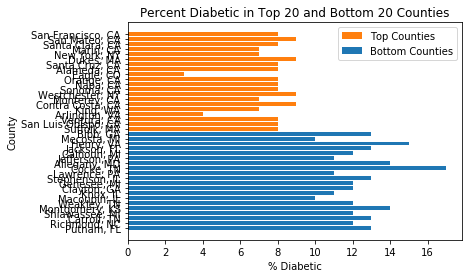

In [10]:
# Plot
bottom_plot = plt.barh(bottom_county_data['County'], bottom_county_data['% Diabetic'])
top_plot = plt.barh(top_county_data['County'], top_county_data['% Diabetic'])

plt.title("Percent Diabetic in Top 20 and Bottom 20 Counties")
plt.xlabel("% Diabetic")
plt.ylabel("County")
plt.savefig("plotMedDiabetic.png")
# plt.show()

plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='upper right')

# plt.legend(bottom_county_data,top_county_data, loc=1)
# plt.legend(bottom_county_data, loc="best")

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

In [ ]:
# Specific health factor 
uninsured_rate = health_factor_df[["County", "% Uninsured"]]
uninsured_rate.head()

In [ ]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['% Uninsured']
pop2= bottom_county_data["% Uninsured"]
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['% Uninsured'])

plt.barh(top_county_data['County'], top_county_data['% Uninsured'])
plt.title("Percent Uninsured in Top 20 and Bottom 20 Counties")
plt.xlabel("% Uninsured")
plt.ylabel("County")
plt.savefig("plotMedUninsured.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

# PCP Rate
primary care physician per 100,000 population

In [ ]:
# Get specific health factor data

PCP_rate_df = health_factor_df[["County", "PCP Rate"]]
PCP_rate_df.head()

In [ ]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['PCP Rate']
pop2= bottom_county_data['PCP Rate']
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['PCP Rate'])

plt.barh(top_county_data['County'], top_county_data['PCP Rate'])
plt.title("Primary Care Physician in Top 20 and Bottom 20 Counties")
plt.xlabel("PCP Rate")
plt.ylabel("County")
plt.savefig("plotMedPCP.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

# Dentist Rate
dentist per 100,000 population

In [ ]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]
dentist_rate_df.head()

In [ ]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['Dentist Rate']
pop2= bottom_county_data['Dentist Rate']
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['Dentist Rate'])

plt.barh(top_county_data['County'], top_county_data['Dentist Rate'])
plt.title("Dentist Rate in Top 20 and Bottom 20 Counties")
plt.xlabel("Dentist Rate")
plt.ylabel("County")
plt.savefig("plotMedDentist.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

# MHP Rate
mental health provider per 100,000 population

In [ ]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]
MHP_rate.head()

In [ ]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['MHP Rate']
pop2= bottom_county_data['MHP Rate']
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['MHP Rate'])

plt.barh(top_county_data['County'], top_county_data['MHP Rate'])
plt.title("Mental Health Provider in Top 20 and Bottom 20 Counties")
plt.xlabel("MHP Rate")
plt.ylabel("County")
plt.savefig("plotMedMHP.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

# Percent Smokers

In [ ]:
# Get specific health factor data

smokers = health_factor_df[["County", "% Smokers"]]
smokers.head()

In [ ]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, smokers, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, smokers, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['% Smokers']
pop2= bottom_county_data['% Smokers']
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% Smokers'])

plt.barh(top_county_data['County'], top_county_data['% Smokers'])
plt.title("Percent Smokers in Top 20 and Bottom 20 Counties")
plt.xlabel("% Smokers")
plt.ylabel("County")
plt.savefig("plotMedSmokers.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

# Adult Obesity
- Percentage of adults that report BMI >= 30

In [ ]:
# Get specific health factor data

obese = health_factor_df[["County", "% Obese"]]
obese.head()

In [ ]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, obese, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, obese, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['% Obese']
pop2= bottom_county_data['% Obese']
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% Obese'])

plt.barh(top_county_data['County'], top_county_data['% Obese'])
plt.title("Percent Obese in Top 20 and Bottom 20 Counties")
plt.xlabel("% Obese")
plt.ylabel("County")
plt.savefig("plotMedObese.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

# Teen Birth Rate
- Births per 1,000 females ages 15-19

In [ ]:
# Get specific health factor data

teen_birth = health_factor_df[["County", "Teen Birth Rate"]]
teen_birth.head()

In [ ]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, teen_birth, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, teen_birth, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['Teen Birth Rate']
pop2= bottom_county_data['Teen Birth Rate']
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['Teen Birth Rate'])

plt.barh(top_county_data['County'], top_county_data['Teen Birth Rate'])
plt.title("Teen Birth Rate in Top 20 and Bottom 20 Counties")
plt.xlabel("Teen Birth Rate")
plt.ylabel("County")
plt.savefig("plotMedTeenBirth.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot

# Percent Low Birth Weight
- Percentage of births with low birth weight (<2500g)

In [ ]:
# Get specific health factor data

LBW = health_factor_df[["County", "% LBW"]]
LBW.head()

In [ ]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, LBW, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, LBW, on='County', how='left')
bottom_county_data.head()

In [ ]:
# Get p-value
pop1 = top_county_data['% LBW']
pop2= bottom_county_data['% LBW']
stats.ttest_ind(pop1, pop2, equal_var=False)

In [ ]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% LBW'])

plt.barh(top_county_data['County'], top_county_data['% LBW'])
plt.title("Percent Low Birth Rate in Top 20 and Bottom 20 Counties")
plt.xlabel("% Low Birth Rate")
plt.ylabel("County")
plt.savefig("plotMedLBW.png")
plt.show()

In [ ]:
# Make plot prettier

In [ ]:
# Export plot